In [2]:
# Dependencies and Setup
#!pip install matplotlib
#!pip install pandas
#!pip install numpy
#!pip install requests
#!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

In [3]:
#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
meteor_data_path = "meteorite-landings.csv"

meteor_data = pd.read_csv(meteor_data_path)

In [5]:
meteor_data.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [6]:
summary_stats = meteor_data.describe()
summary_stats[['mass', 'year']]

,mass,year
count,4.558500e+04,45428.000000
mean,1.327808e+04,1991.772189
std,5.749889e+05,27.181247
min,0.000000e+00,301.000000
25%,7.200000e+00,1987.000000
50%,3.260000e+01,1998.000000
75%,2.026000e+02,2003.000000
max,6.000000e+07,2501.000000


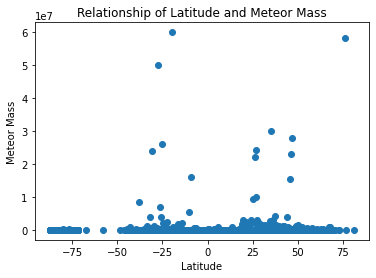

In [7]:
plt.scatter(meteor_data['reclat'], meteor_data['mass'])
plt.title('Relationship of Latitude and Meteor Mass')
plt.xlabel('Latitude')
plt.ylabel('Meteor Mass')
plt.savefig("Meteor/latmass.png")
plt.show()

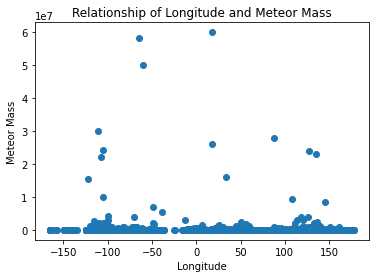

In [8]:
plt.scatter(meteor_data['reclong'], meteor_data['mass'])
plt.title('Relationship of Longitude and Meteor Mass')
plt.xlabel('Longitude')
plt.ylabel('Meteor Mass')
plt.savefig("Meteor/lonmass.png")
plt.show()

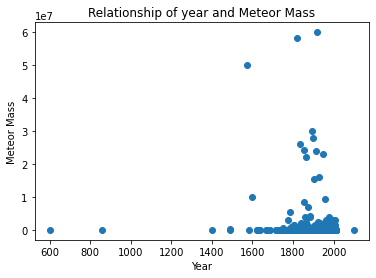

In [9]:
plt.scatter(meteor_data['year'], meteor_data['mass'])
plt.title('Relationship of year and Meteor Mass')
plt.xlabel('Year')
plt.ylabel('Meteor Mass')
plt.savefig("Meteor/yearmass.png")
plt.show()

In [10]:
meteor_class = meteor_data.groupby("recclass")
meteor_class.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.00,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.00,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.00,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.00,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.00,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45487,Yamato 983871,40492,Valid,H-melt breccia,81.77,Found,1998.0,0.00000,0.00000,"(0.000000, 0.000000)"
45601,Yamato 984044,40664,Valid,CM,62.16,Found,1998.0,0.00000,0.00000,"(0.000000, 0.000000)"
45696,Zakłodzie,30390,Valid,Enst achon-ung,8680.00,Found,1998.0,50.76278,22.86611,"(50.762780, 22.866110)"
45705,Zerhamra,30403,Valid,"Iron, IIIAB-an",630000.00,Found,1967.0,29.85861,-2.64500,"(29.858610, -2.645000)"


In [29]:
meteor_fall = meteor_data.groupby("fall").count()
meteor_found = meteor_fall[['name']]
meteor_found

,name
fall,
Fell,1107
Found,44609


<AxesSubplot:xlabel='fall'>

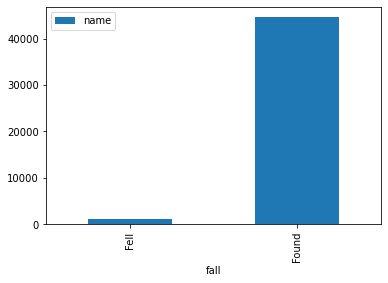

In [34]:
meteor_found.plot(kind = "bar")
